In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
palette = 'colorblind'
sns.set_palette(palette); sns.set_color_codes(palette)  # Fija los nombres cortos para los colores según la paleta de seaborn

# NumPy

NumPy (Numerical Python) es una librería para cómputo científico. Esta librería contiene muchas funciones matemáticas que permiten realizar operaciones de álgebra lineal, generar números pseudo-aleatorios, etc. De forma muy general el computo científico se basa en operar con arreglos de números, a veces estos arreglos representan matrices y vectores y las operaciones necesarias son fundamentalmente las del algebra lineal. En otros casos, como el análisis de datos, los arreglos de números no necesariamente (o no siempre) son vectores y matrices en estricto sentido matemático. Por ejemplo casi cualquier conjunto de datos puede ser pensado como un arreglo de números. Una imagen es un arreglo bidimensional de números donde cada número representa el brillo de un pixel. Un sonido es un arreglo unidimensional que representa intensidad versus tiempo.

En definitiva para el computo científico es necesario contar con formas eficientes de almacenar y manipular arreglos de números. Y NumPy ha sido diseñado para esta tarea. El código escrito en NumPy suele ser más corto que el código equivalente en _Python puro_. El uso de _loops_ es reducido ya que muchas operaciones se aplican directamente sobre arreglos (_arrays_). Esto se conoce como vectorizar el código, internamente los _loops_ siguen estando presentes pero son ejecutados por rutinas optimizadas escritas en lenguajes como C o Fortran. Además, NumPy provee de muchas funciones matemáticas/científicas listas para usar. Esto reduce la cantidad de código que debemos escribir (reduciendo las chances de cometer errores) y más importante, esas funciones están escritas usando implementaciones eficientes y confiables.

Para poder usar NumPy debemos importarlo, la forma más común de importar NumPy es la siguiente:

In [ ]:
import numpy as np

## Arreglos (arrays)

NumPy usa una estructura de datos llamada arreglos. Los arreglos de NumPy son similares a las listas de Python, pero son mas eficientes para realizar tareas numéricas. La eficiencia deriva de las siguientes características:

* Las listas de Python son muy generales, pudiendo contener objetos de distinto tipo. Además los objetos son asignados dinamicamente, es decir el tamaño de una lista no está predefinido, siempre podemos agregar más y más elementos. 

* Por el contrario, los arreglos de NumPy son **estáticos**  y **homogéneos**. El tipo de los objetos se determina cuando el array es creado (de forma automática o por el usuario) lo que permite hacer uso eficiente de la memoria.

* Otra razón por la cual los arreglos son más eficientes que las listas es que en Python todo es un objeto, incluso los números! Por ejemplo en C un entero es esencialmente un rótulo que conecta un lugar en la memoria de la computadora cuyos _bytes_ se usan para codificar el valor de ese entero. Sin embargo en Python un entero es un objeto más complejo que contiene más información que simplemente el valor de un número. Esto da flexibilidad a Python, pero el costo es que es más lento que un lenguaje como C. Este costo es aún mayor cuando combinamos muchos de estos objetos en un objeto más complejo, por ejemplo cuando combinamos enteros dentro de una lista.

Otra ventaja de los arreglos es que se comportan de forma similar a los vectores y matrices usados en matemática.


### Creando arreglos

Existen varias rutinas para [crear](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html) arreglos de NumPy a partir de:

* Listas o tuplas de Python
* Rangos numéricos
* Números aletorios
* Ceros y unos
* Archivos

#### A partir de listas y tuplas

Para crear arreglos a partir de listas (o tuplas) podemos usar la funcion **array**.

In [7]:
v = np.array([1, 2, 3, 4 , 5, 6])
v

array([1, 2, 3, 4, 5, 6])

In [8]:
M = np.array([[1, 2], [3, 4], [5, 6]])
M

array([[1, 2],
       [3, 4],
       [5, 6]])

In [9]:
v.shape, M.shape

((6,), (3, 2))

#### A partir de un rango numérico

Una forma de crear arreglos desde cero es usando rangos. Por ejemplo podemos crear un arreglos conteniendo números igualmente espaciados en el intervalo [desde, hasta), usando **arange**

In [ ]:
np.arange(0, 10, 1) # desde, hasta(sin incluir), paso

Otra función para crear rangos es **linspace** que devuelve numeros igualmente espacios en el intervalo [desde, hasta] (es decir incluyendo el _hasta_). Otra diferencia con **arange** es que no se especifica el _paso_ si no la cantidad total de números que contendrá el arreglo.

In [ ]:
np.linspace(1, 10, 25) # desde, hasta, elementos (elementos es opcional)

#### A partir de números aleatorios

Los números aleatorios son usados en muchos problemas científicos. En la práctica las computadoras son solo capaces de generar números pseudo-aleatorios, _i.e._ números que para los fines prácticos lucen como números aleatorios.

Todas las rutinas para generar números aleatorios viven dentro del módulo [random](http://docs.scipy.org/doc/numpy/reference/routines.random.html). Python usa un algortimo llamado [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_twister) para generar números pseudo-aleatorios. Este algorítmo es más que suficiente para fines científicos, pero no es util en caso que necesitemos números pseudo-aleatorios para usar en criptografía.

La función mas simple es **rand**. Esta función crea un arreglo a partir de una distribución uniforme en el intervalo [0, 1).

In [26]:
np.random.rand(2, 5)  # arreglo con forma (2, 5)

array([[ 0.49352285,  0.08316333,  0.47115784,  0.69195759,  0.21497086],
       [ 0.22791102,  0.45410139,  0.71081759,  0.53728249,  0.17095438]])

De forma similar **randn** devuelve muestras a partir de la distribución normal estándar (media = 0, desviación estándard =1).

In [23]:
np.random.normal(0, 1, 10)

array([-0.11389045, -0.63125937, -0.46749836,  0.11745547,  0.76411955,
       -1.86885352, -0.13095255, -0.26945107, -0.42167677,  0.51145424])

Los arreglos de NumPy, al igual que las listas se pueden indexar, y se pueden tomar rebanadas. La sintaxis es la misma que la de las lsitas solo que esta sintaxis puede ser más compleja ya que podemos ndexar de acuerdo a las dimensiones

In [13]:
M[0]

array([1, 2])

In [12]:
M[1,:]  # fila 1

array([3, 4])

In [ ]:
M[:,1]  # columna 1

## Funciones Universales (Ufunc)

NumPy provee de varias funciones matemáticas. Esto puede parecer redundante ya que la librería estandard de Python ya provee de este tipo de funciones. La diferencia, es que la funciones matemáticas de NumPy (como otras funciones) puede ser aplicadas en un solo paso a todos los elementos de un arreglo.

Por ejemplo, si quisieramos calcular la raíz cuadrada de todos los elementos de una lista de Python deberíamos hacer un loop sobre cada elementos de la lista y computar la raíz cuadrada a cada elemento (y posiblemente almacenarlo en otra lista).
Con NumPy podemos hacer esto en una sola linea.

Primero definamos un nuevo arreglo

In [17]:
np.sqrt(M)

array([[ 1.        ,  1.41421356],
       [ 1.73205081,  2.        ],
       [ 2.23606798,  2.44948974]])

Funciones como _sqrt_, que operan sobre arreglos _elemento-aelemento_ se conocen como [funciones universales](http://docs.scipy.org/doc/numpy/reference/ufuncs.html) (usualmente abreviadas como ufunc).

Una de las ventajas de usar ufuncs es que permiten escribir código más breve. Otra ventaja es que los cómputos son más rápidos que usando loops de Python. Detrás de escena NumPy si realiza un loop, pero el loop se realiza en un legunaje como C o Fortran, por lo que hay una ganancia considerable en velocidad, respecto de código en Python puro. Además, el código usado por NumPy es código que suele estar optimizado gracias a los años de labor de programadores/científicos.

In [19]:
np.sum(M)

21

En el ejemplo anterior la suma se hizo sobre el arreglo "aplanado". Hay veces que esto no es lo que queremos, si no que necesitamos sumar sobre alguna de las dimensiones del arreglo.

In [20]:
np.sum(M, axis=0)

array([ 9, 12])

In [18]:
np.sum(M, axis=1)

array([ 3,  7, 11])

## Medidas de centralidad y dispersión


En el capítulo anterior vimos como calcular la media y la mediana y la varianza. NumPy nos permite calcular estas cantidades a partir de arrays de forma muy simple. Por ejemplo para calcular la media podemos escribir.

In [32]:
np.mean(v)

3.5

Una forma alternativa es la siguiente

In [30]:
v.mean()

3.5

#### 1.3.2.2 Desviación estándar

La desviación estándar es la raíz cuadrada de la varianza, en muchos problemas teóricos resulta más fácil manipular varianzas que desviaciones estándar, pero en general resulta más simple interpretar las desviaciones estándar ya que las unidades son las mismas que la de los datos.

$$\sigma = \sqrt{V(x)}$$

In [40]:
print('varianza {:.2f}'.format(np.var(v)))
print('desviación estándar {:.2f}'.format(np.std(v)))

varianza 2.92
desviación estándar 1.71


Existen otras medidas para caracterizar los datos, llamadas de forma, como son la [curtosis](https://en.wikipedia.org/wiki/Kurtosis) y el [sesgo](https://en.wikipedia.org/wiki/Skewness) (o asimetría estadística).

Estás medidas son menos usadas en parte por que su interpretación es menos intuitiva que otras medidas como la media o la varianza, al punto que la interpretación correcta de estas medidas ha sido objeto de varias discusiones y malos entendidos a los largo de los años. Otra razón para su menor uso es que históricamente gran parte de la estadística se ha basado en el uso de Gausianas (o en asumir que los datos son Gaussianos) para las cuales la curtosis y el sesgo son cero.

### 1.3.3 Cuantil

Los [cuantiles](https://en.wikipedia.org/wiki/Quantile) son puntos de corte que dividen al conjunto de datos en grupos de igual tamaño. Existen varios nombres para  los cuantiles según la cantidad de divisiones que nos interesen.

* Los cuartiles son los tres puntos que dividen a la distribución en 4 partes iguales, se corresponden con los cuantiles 0.25, 0.50 y 0.75.
* Los quintiles dividen a la distribución en cinco partes (corresponden a los cuantiles 0.20, 0.40, 0.60 y 0.80);
* Los deciles, que dividen a la distribución en diez partes.
* Los percentiles, que dividen a la distribución en cien partes.
* La mediana es el percentil 50 o el cuartil 0.5.
    
En Python el cálculo de estos estadísticos puede realizarse fácilmente usando funciones predefinidas en NumPy y SciPy.

In [4]:
'percentiles 25={:.2f}; 50={:.2f}; 75={:.2f}'.format(*(np.percentile(x , [25, 50, 75])))

'percentiles 25=9.27; 50=16.80; 75=26.78'

Todas las medidas antes mencionadas son útiles por que resumen en pocos números una gran cantidad de datos. Sin embargo, al sintetizar la información, también pueden ocultarla. Es por ello que siempre es buena idea visualizar la distribución de los datos. Cinco representaciones comunes son los histogramas, _kernel plots_, _stripplot_, _box plots_ y _violin plots_.

### 1.3.4 Histogramas

En un [histograma](https://en.wikipedia.org/wiki/Histogram) se representa la frecuencia con la que aparecen los distintos valores en un conjunto de datos. Se utilizan _barras_ contiguas para representar los datos. La superficie (y no la altura) de las barras es proporcional a la frecuencia de datos observados. Los datos son agrupados en _bins_, y suelen graficarse sin normalizar o normalizados. Normalizar implica que la superficie total del histograma suma 1. No hay que confundir los histogramas con los gráficos de barras que se utilizan para comparar valores discretos entre grupos y mientras que los histogramas se usan para representar distribuciones.

Los histogramas son sensibles a la cantidad de _bins_ que se usan. Si usamos unos pocos _bins_ no lograremos capturar la estructura de los datos, si usamos demasiados _bins_ no solo estaremos representando la estructura de los datos si no también el ruido. Esto se ve más claramente si nos vamos a los extremos, por un lado tendríamos un sola barra, por el otro una barra por cada dato.

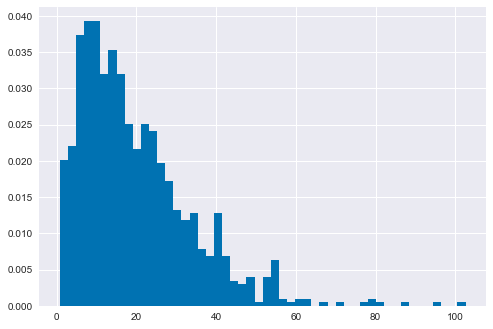

In [4]:
x = np.random.gamma(2, 10, size=1000)
#x = np.random.normal(0, 1, size=1000)

plt.hist(x, bins=50, normed=True, cumulative=False);  # probá cambiar los bins, y los demás argumentos.

Aprovechando lo que hemos aprendido generemos un gráfico que muestre la diferencia entre media y mediana

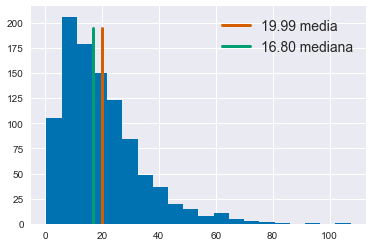

In [38]:
plt.hist(x, bins=20)
media = np.mean(x)
mediana = np.median(x)

plt.axvline(media, ymax=.9, c='r', lw='3', label='{:.2f} media'.format(media))
plt.axvline(mediana, ymax=.9, c='g', lw='3', label='{:.2f} mediana'.format(mediana))
plt.legend(fontsize=14);

### 1.3.5 Kernel Density plot

Es una forma _suavizada_ de un histograma. Un gráfico [_KDE_](https://en.wikipedia.org/wiki/Kernel_density_estimation) se dibuja de la siguiente forma: se reemplaza cada dato por una distribución Gaussiana y luego se suman todas las Gaussianas. En vez de una distribución Gaussiana es posible usar otras distribuciones. El nombre genérico para esas distribuciones cuya suma se usa como aproximación de una función es el de _kernel_. Cualquier función simétrica cuya integral sea 1 puede ser usada como kernel, la Gaussiana es una de los kernels más usados.

De forma análoga a lo que sucede con los _bins_ los KDE son sensibles a un parámetro llamado _bandwith_. Existen varias _heurísticas_ (reglas empíricas que suelen funcionar bien en la práctica) para ajustar el _bandwith_ de forma automática de acuerdo a los datos.

Es posible usar matplotlib para graficar un kde, pero no existe una función que lo haga de forma automática. Es decir es posible pero requiere de cierto trabajo. Lo mismo sucede con otros tipos de gráficos usados para analizar datos, es por ello que existe una biblioteca llamada Seaborn, la cual _no es más_ que una colección de funciones escritas usando matplotlib. Si prestan atención a la primer celda verán que importamos seaborn de la siguiente forma.

    import seaborn as sns
    
Usando Seaborn, podemos hacer un kde de forma muy simple

/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


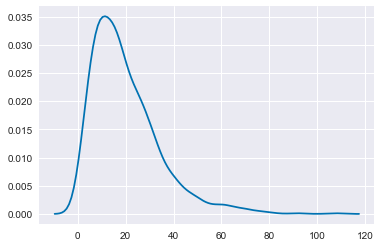

In [47]:
sns.kdeplot(x);   #también ver la función sns.distplot()

Como Seaborn está escrito usando Matplotlib, podemos modificar los gráficos realizado con Seaborn usando Matplotlib. un sencillo ejemplo que muestra que esto es posible es el siguiente.

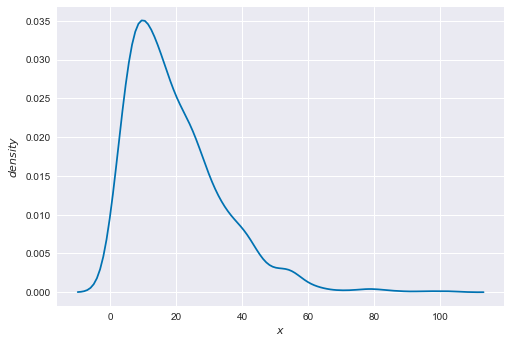

In [9]:
sns.kdeplot(x)
plt.xlabel('$x$')
plt.ylabel('$density$');

Antes de continuar vamos a presentar a otra biblioteca de Python científico cuyo nombre es SciPy (Scientific Python).Esta biblioteca de Python incluye una especie de _popurrí_ de funciones útiles comunmente usadas en ciencia. Si observan con atención la primer celda de esta notebook verán que escribimos:

    from scipy import stats

De esta forma estamos importando un solo módulo (`stats`) de SciPy. Es común al trabajar con SciPy importar solo los módulos que se van a usar. 

El módulo `stats` ofrece varias funciones útiles en estadística. Por ejemplo podemos obtener la _kde_ y trabajar con ella. En el siguiente ejemplo estimamos primero la kde de `x`, luego evaluamos la función entre 0 y 200 (un rango arbitrario, pero más amplio que nuestro datos) y por último computamos la moda, como el valor para el cual la densidad toma el valor máximo (el valor mas frecuente de la distribución). 

In [5]:
kde = stats.gaussian_kde(x)
vec = np.linspace(0, 200, 1000)
moda = vec[np.argmax(kde.evaluate(vec))]
'moda {:.2f}'.format(moda)

'moda 9.81'

Quizá la tercer linea merece una explicación. `argmax` calcula el valor máximo de su argumento (vec en este caso) y devuelve el índice donde se encuentra ese valor. Ese índice se lo pasamos a vec, para que nos devuelva el valor máximo (la moda!).

### Stripplot

Este tipo de gráficos sirve para visualizar un conjunto de datos donde una variable es métrica y las demás son categóricas.

Para visualizarlos podemos usar la función _strippplot_ de seaborn (un gráfico similar es el _swarmplot_). Los stripplot se suelen graficar agregado un poco de ruido/fluctuaciones (_jitter_ en inglés) en lo largo del eje de las $x$, esto es simplemente un _truco_ para facilitar la visualización de los puntos, que caso contrario caerían todos en una misma linea ya que las variables categóricas no tienen dispersión.

Puede ser útil en si mismo o puede ser usado superpuesto sobre un _boxplot_ o _violinplot_. 

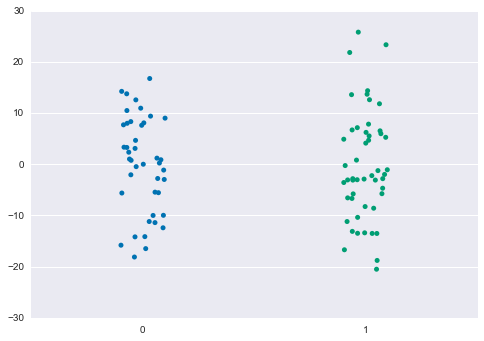

In [9]:
y0 = np.random.normal(0, 10, size=42)
y1 = np.random.normal(-1, 10, size=50)
sns.stripplot(data=[y0, y1], jitter=True);

### 1.3.6 Gráficos de cajas o de bigotes (Box plot o Wisker-plot)

Los [gráficos de caja](https://en.wikipedia.org/wiki/Box_plot) son una forma de graficar distribuciones basada en cuartiles. Al igual que el _stripplot_ este tipo de gráficos es muy útil cuando se quieren comparar varios grupos de datos en simultaneo. La caja está delimitada por el primer y tercer cuartil, mientras que la línea dentro de la caja es el segundo cuartil (la mediana). Los _bigotes_ pueden indicar varias medidas, por eso es siempre importante leer/escribir la leyenda o texto que acompaña a un boxplot, a veces se usa una desviación estandard, otras veces los percentiles 2 y 98, otras veces (como en el gráfico a continuación) es una función del rango intercuartil y los valores por fuera de los bigotes se suelen considerar como datos aberrantes (ver más adelante).

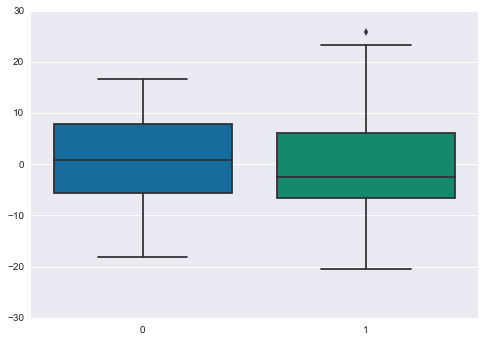

In [10]:
sns.boxplot(data=[y0, y1]);

### 1.3.7 Gráficos de violín (violin plot)

Los gráficos de [violín](https://en.wikipedia.org/wiki/Violin_plot) son una combinación de gráficos de caja con kde.

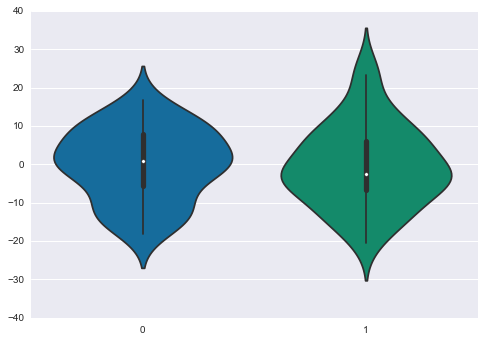

In [11]:
sns.violinplot(data=[y0, y1]);

### 1.3.8 Datos aberrantes

Los datos aberrantes (_outliers_) son valores que están muy alejados de la mayoría de los valores de una distribución. Los datos aberrantes pueden ser errores de medición, errores al procesar los datos o incluso valores correctos pero inusuales (sobre todo cuando la muestra es pequeña). Siempre es buena idea revisar si nuestros datos contienen datos aberrantes y en muchos casos puede llegar a ser conveniente removerlos. Siempre que se remueve un dato aberrante deberá reportarse que fue removido y explicar cual fue el criterio usado para removerlos. Es importante destacar que la decisión de remover datos aberrantes no debe ser tomada a la ligera. Si un supuesto dato _aberrante_ fuese un valor correcto quizá nos estaría indicando que no comprendemos del todo el fenómeno estudiado y al dejarlo de lado podríamos estar perdiéndonos de un importante descubrimiento!

Existen varios criterios para identificar datos aberrantes. Dos muy usados son:
   * todo valor por debajo de $\mu$-n$\sigma$ y por encima de $\mu$+n$\sigma$. Donde n = 1, 2, 3, 6 etc...
   * Se define el rango intercuartil como $IQR = q2 − q3 = p25-p75$ y se define como _aberrante_ todo valor por debajo de $q2-1.5*IQR$ y por encima de $q3+1.5*IQR$

El primer criterio suele ser usado para distribuciones que se asemejan a Gaussianas mientras que el segundo es más general ya que el rango intercuartil es una medida más robusta de la dispersión de una distribución que la desviación estándar.

Según la desigualdad de Chebyshev, al menos  $1 - \frac{1}{k^2}$ de los valores de una distribución están dentro $k$ desviaciones estandard. Es decir casi todos los valores de una distribución de probabilidad están cerca de la media. Por lo tanto el 75% y el 89% de los valores de una distribución se encuentran dentro de 2 y 3 desviaciones estandard, respectivamente. La desigualdad de Chebyshev indica una cota, para varias distribuciones es posible que los valores se encuentren mucho más concentrados alrededor de la media. Por ejemplo esto sucede con las curvas Gaussianas. Para una curva Gaussiana se cumple la regla 68-95-99,7 es decir el 68 por cierto de los datos se encuentra dentro de 1 desviación estandard, el 95 dentro de 2 y el 99.7 dentro de 3.

## 1.4 Relación entre dos variables

Los gráficos que hasta ahora hemos visto sirven para visualizar una variable por vez, (aunque _sns.kdeplot()_ soporta la visualización de dos variables). En muchos casos necesitamos entender la relación entre dos variables. Dos variables están inter-relacionadas, si el conocer el valor de una de ellas provee de información sobre el valor de la otra.

### 1.4.1 Gráfico de dispersión

Un [gráfico de dispersión](https://en.wikipedia.org/wiki/Scatter_plot) es un gráfico científico que utiliza las coordenadas cartesianas para mostrar los valores de dos variables en simultaneo. Estos gráficos son la forma más simple de visualizar la relación entre dos variables.

Supongamos que tenemos dos variables, que creativamente llamaremos $x$, $y$.

In [12]:
x = np.random.normal(size=1000)
y = np.random.normal(loc=x, scale=1) 

Usando matplotlib podemos graficar ambas variables usando la función _scatter_

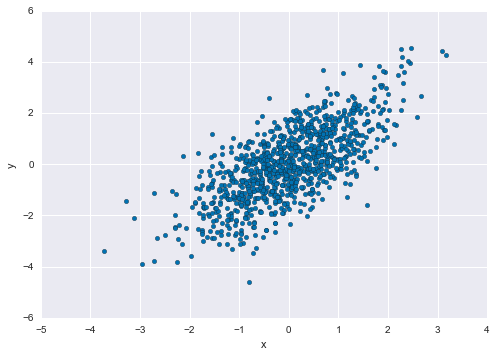

In [13]:
plt.scatter(x, y, alpha=1)
plt.xlabel('x')
plt.ylabel('y');

Seaborn provee de múltiples opciones para visualizar relaciones entre dos variables, varias de ellas están contenidas en la función _joinplot_. Esta función además de mostrar el gráfico de dispersión muestra las distribuciones marginales de $x$ e $y$.

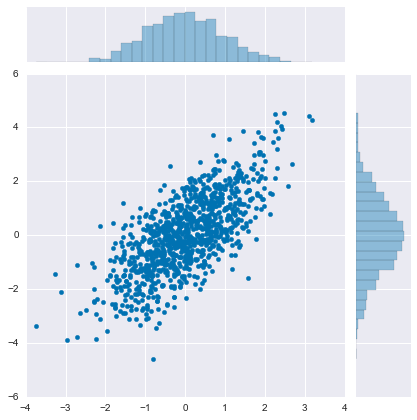

In [14]:
sns.jointplot(x, y,  kind='scatter', stat_func=None);

El siguiente gráfico usa un _kernel density estimation_ como vimos anteriormente, lo hace tanto para las distribuciones marginales como la distribución conjunta.

/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


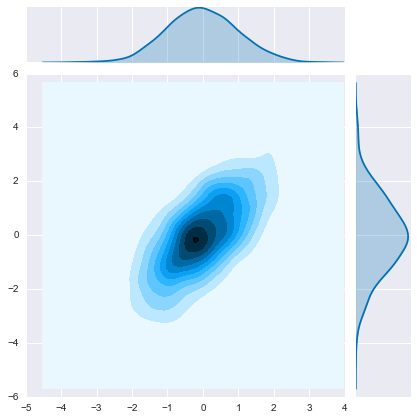

In [15]:
sns.jointplot(x, y,  kind='kde', stat_func=None);

Un gráfico de _hexbin_ es similar a un histograma, pero bidimensional. El nombre se debe a que los datos son agrupados en celdas hexagonales. ¿Por qué hexágonos en vez de cuadrados o triángulos? Simplemente por que las celdas hexagonales introducen una menor distorsión en los datos que otras opciones. Esto se debe a las siguientes razones:

* Los hexágonos se relacionan con sus vecinos por lados (los cuadrados y triángulos lo hacen por vértices y lados). Es decir se vinculan con sus vecinos de forma más simétrica. 
* Los hexágonos son el polígono con mayor número de lados que mejor cubren ([teselan](https://es.wikipedia.org/wiki/Teselado)) una superficie plana.
* Los hexágonos introducen menor distorsión visual que por ejemplo los cuadrados. Un malla cuadrada nos hace que tendamos a mirar en sentido horizontal y vertical.

Los hexbin son útiles cuando necesitamos visualizar muchos datos. Por muchos me refiero a números por encima de las centenas de miles de datos. Cuando tenemos una gran cantidad de datos los puntos empiezan a superponerse y puede que ciertos patrones pasen desapercibidos, por lo que visualizar datos agrupados y no los datos _crudos_ suele ser buena idea. Además calcular los _hexbin_ tiene un costo menor que los KDE.

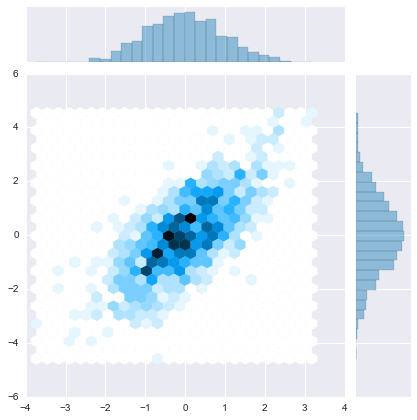

In [16]:
sns.jointplot(x, y,  kind='hex', stat_func=None);  # ver también plt.hexbin();

Una alternativa para evitar que algunos puntos opaquen al resto, en un gráfico de dispersión _común_, es hacer los puntos semitransparentes. En matplotlib la transparencia de los objetos es controlada mediante un parámetro llamado _alpha_ que va entre 0 y 1. Este es un buen momento para volver algunas celdas atrás y ver como este y otros parámetros pueden ser usados para modificar las gráficas realizadas.

### 1.4.2 Correlación

Como dijimos en la sección anterior dos variables están relacionadas si una provee información sobre la otra. Siendo un poco más formales decimos que dos variables son independientes entre si, si se cumple que:

$$p(x|y) = p(x)$$

Es decir si la probabilidad de $x$ dado $y$ es igual a la probabilidad de $x$. En otras palabras, tener información de $y$ no me brinda información sobre $x$. Si dos variables son independientes entonces:

$$p(x,y) = p(x) p(y)$$

La probabilidad de que ocurra $x$ e $y$ de forma simultanea es igual al producto de sus probabilidades.

La correlación es una medida de la dependencia de dos variables.  Existen varios coeficientes de correlación el más frecuentemente usado es el coeficiente de correlación de Pearson. Este coeficiente solo sirve para medir relaciones lineales entre variables. El coeficiente de correlación de Pearson es el resultado de dividir la covarianza de las dos variables por el producto de sus desviaciones estándar:

$$\rho_{(x,y)}={E[(x-\mu_x)(y-\mu_y)] \over \sigma_x\sigma_y}$$

En palabras (que puede ser más oscuro que en fórmulas), el coeficiente de correlación de Pearson indica como varia una variable al variar la otra respecto de la variación intrínseca de cada una de las variables.

¿Por que usar el coeficiente de Pearson y no directamente la covarianza? Principalmente por que las unidades no suelen tener sentido físico y la magnitud suele ser difícil de interpretar, por ejemplo el número que indica una relación lineal perfecta será distinto dependiendo de los datos usados. En cambio al dividir por las desviaciones estándar, obtenemos una cantidad que varía entre -1 y 1 y que no tiene dimensiones. 

La función _joinplot_, que vimos en el apartado anterior, por defecto nos devuelve el valor del coeficiente de correlación de Person, junto con un valor $p$ cuyo significado estudiaremos en el capítulo sobre estadística frecuentista.

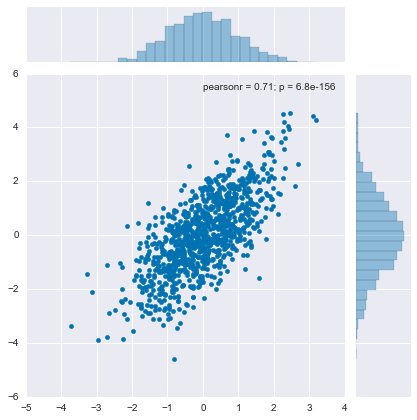

In [17]:
sns.jointplot(x, y,  kind='scatter');

Identificar correlaciones puede ser útil para entender como dos variables se relacionan y para predecir una a partir de la otra. Es por ello que muchas veces además de visualizar la relación entre variables se estiman modelos que _ajustan_ a los datos. Como por ejemplo lineas rectas. En los próximos capítulos veremos como crear modelos lineales y no-lineales. Por ahora simplemente nos conformaremos con dejar que seaborn ajuste los datos a un recta por nosotros.

/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


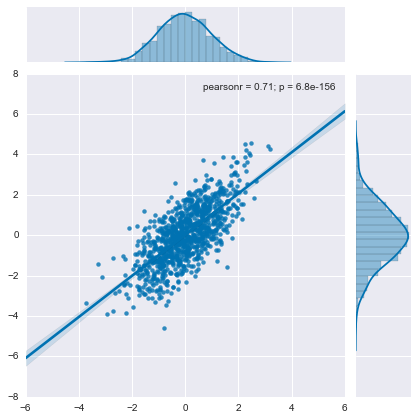

In [18]:
sns.jointplot(x, y,  kind='reg');

En la siguiente imagen se puede ver varios conjuntos de datos y sus respectivos coeficientes de correlación de Pearson. Es importante notar que el coeficiente de correlación de Pearson refleja la linearidad y la dirección de dicha linearidad (primera fila), pero no la pendiente de dicha relación (fila del medio). Tampoco es capaz de capturar relaciones no-lineales. En la fila del medio la línea con pendiente cero tiene un coeficiente de correlación de Pearson indefinido, ya que la varianza de la variable $y$ es 0.

<img src='imagenes/Correlación.png' alt="correlación", width=600, height=600> 

### 1.4.3 Correlación y causalidad

Si existe algún tipo de mecanismo que hace que una variable dependa de otra deberá existir correlación (aunque no necesariamente lineal). Pero lo opuesto no es siempre cierto, dos variables pueden estar correlacionadas sin que exista ningún tipo de mecanismo que las vincule. Dado el gran conjunto de variables que es posible medir no debería ser sorprendente que existan correlaciones [espurias](http://www.tylervigen.com/). Por ejemplo en la siguiente figura se puede ver que el número piratas y la media de la temperatura global están inversamente correlacionados.

<img src='http://upload.wikimedia.org/wikipedia/commons/thumb/d/de/PiratesVsTemp%28en%29.svg/1024px-PiratesVsTemp%28en%29.svg.png' alt="Pirates_temp", width=600, height=600> 

Este gráfico fue creado a propósito para ilustrar, entre otros puntos, que correlación no implica causalidad (notesé además que el orden de los datos en el eje $x$ es erróneo y la escala es al menos _problemática_). Para más detalles del origen de esta gráfica leer esta entrada de [wikipedia](https://es.wikipedia.org/wiki/Pastafarismo#Los_piratas_y_el_calentamiento_global) 

La aparente relación entre las variables temperatura media y cantidad de piratas podría ser explicada de varias formas, quizá es pura casualidad o quizá se podría establecer que los cambios introducidos por la revolución industrial terminaron por un lado por un aumentando la cantidad de $CO_2$ (y otros gases de invernadero) y por el otro produciendo cambios socio-culturales y tecnológicos que llevaron (luego de una larga cadena de sucesos) a la disminución de los piratas. Pero ¡no es cierto que podamos contrarrestar el calentamiento global simplemente aumentando la cantidad de piratas!

Para poder establecer una relación causal a partir de una correlación hace falta poder establecer y probar la existencia de un mecanismo que vincule ambas variables. Espero que este ejemplo haya servido para ayudarles a entender que correlación no implica  causalidad. 

<img src='http://imgs.xkcd.com/comics/correlation.png' alt="xkcd">

## 1.5 Estadística Inferencial

En muchos casos describir los datos y graficarlos puede ser suficiente para nuestros propósitos. Pero en otros casos esto es solo el primer paso de un análisis que intenta no solo describir los datos si no comprender los procesos o mecanismos que dieron origen a los datos observados. Esto se conoce como estadística inferencial, es una forma de modelado y será el tema central de los próximos capítulos. 

Los modelos son una descripción, simplificada, de un sistema bajo estudio y no solo una descripción de los datos. Los modelos se construyen intentando capturar lo mejor posible la información relevante, por lo que un modelo más complejo no necesariamente es mejor que uno simple. Decenas, cientos o miles de datos pueden pasar a ser descriptos por unos pocos parámetros que definen al modelo (en cierto modo estamos comprimiendo información). Por ejemplo podemos decir que la relación entre cantidad de lluvia ($x$) y crecimiento de una planta ($y$) podría ser descripto por la ecuación de una recta:

$$y = \alpha + \beta * x  + \epsilon$$

En este caso nuestro modelo sería una linea recta y tendría tres parámetros $\alpha$, $\beta$ y $\epsilon$. Algunas de las ventajas de modelar son:

* Los modelos, al ser más simple que el fenómeno estudiado, permiten pensar el problema con mayor claridad.
* Crear un modelo implica pensar acerca del problema y evaluar cuales son los factores que se consideran más relevantes y cuales pueden ser despreciados. 
* Los modelos estadísticos (como otros modelos formales) pueden ser estudiados analíticamente y/o numéricamente lo que puede contribuir enormemente a comprender el fenómeno subyacente a los datos.

En los últimos años se ha desarrollado un conjunto de técnicas agrupadas bajo el rotulo de _machine learning_. El _machine learning_ es algo así como una reinvención de la estadística por parte de informáticos más preocupados en resolver problemas que de matemáticos preocupados en demostrar teoremas.
Una de las diferencias, algo caricaturizada, entre la estadística inferencial y el _machine learning_ es el énfasis en el modelo. En _machine learning_ se usan modelos que en general son de caja negra es decir los parámetros del modelo no son de interés principal, lo importante es predecir. En cambio la estadística inferencial pone énfasis en entender los parámetros del modelo como medio para entender el problema y eventualmente predecir el comportamiento del sistema. Esta linea que separa ambas aproximaciones se está tornando cada vez más difusa, el flujo de ideas entre estas dos disciplinas (que por mucho tiempo se desarrollaron en paralelo), es cada vez mayor. Esto se ve, por ejemplo, en el creciente interés por parte de la comunidad de _Machine Learning_ en desarrollar métodos Bayesianos.

### 1.5.1 Los tres objetivos de la inferencia estadística

Siguiendo el ejemplo de la linea recta a continuación vamos a describir brevemente los tres objetivos de la inferencia estadística. Luego, a medida que avancemos en el curso, veremos cada uno de ellos en detalle.

* **Estimación de parámetros**: En este caso lo que nos interesa es estimar los valores más probables de los parámetros ($\alpha$, $\beta$ y $\epsilon$) y el grado de incerteza o error con que estamos estimando dichos parámetros. 


* **Predicción de valores**: En otros casos lo que nos interesa no tiene tanto que ver con los valores que pueden tomar los parámetros si no que estamos focalizados en obtener un modelo que nos permita, a partir de un nuevo conjunto de datos $x_{n}$, predecir el comportamiento del sistema (representada por la variable $y$).


* **Comparación/Elección de modelos**: Por último en este caso el énfasis está puesto en comparar distintos modelos entre si a fin de determinar cual es mejor explicando los datos observados. Después de todo podría ser que la cantidad de agua y el crecimiento de una planta tuvieran una relación que no fuese necesariamente lineal.

## 1.6 Probabilidad

Las probabilidades son números en el intervalo [0, 1], es decir números que van entre 0 y 1 (incluyendo ambos extremos) y que cumplen con las dos siguientes reglas.

La regla de la suma:
$$p(A) + p(A^c) = 1$$ 

Esto se lee como, _la probabilidad de A más la probabilidad del complemento de A (o la probabilidad de no-A) es igual a 1_. Es decir siempre algo sucede.

La regla del producto:
$$p(A, B) = p(A|B) \times p(B)$$ 

Esto se lee como la _probabilidad de que A y B ocurran es la probabilidad de A dado B por la probabilidad de B_. 


$p(A|B)$ es lo que se conoce como probabilidad condicional, y es la probabilidad de que ocurra A condicionada por el hecho que sabemos que B ha ocurrido. Por ejemplo la probabilidad que una vereda esté mojada es diferente de la probabilidad que la misma vereda esté mojada dado que está lloviendo. Una probabilidad condicional puede ser mayor, menor o igual que la probabiliad no-condicionada. Si el conocer B no ofrece información sobre A entonces $p(A|B) = p(A)$, y entonces A y B serán independientes. Al contrario si conocer B nos da información sobre A entonces la probabiliad condicional será mayor o menor que la no-condicionada dependiendo de si B nos hace que A sea menos o más probable.

Estrictamente todas las probabilidades son condicionales (respecto de algún supuesto o modelo) aún cuando no lo expresemos explícitamente. Podríamos decir que no existen probabilidades sin contexto.

### 1.6.1 Probabilidad clásica

La probabilidad clásica, a veces también llamada _naive_, asume que todos los eventos son igualmente probables. Puede ser útil para calcular la probabilidad de tirar un dado y obtener el número 2, que bajo esta definición será de ($\frac{1}{6}$). Pero puede llevar a errores si pretendemos usar la misma lógica para computar la probabilidad de vida en Marte. Por ejemplo podríamos asumir que o bien hay o bien no hay vida en Marte y por lo tanto llegar a la errónea estimación de que la probabilidad de vida en Marte es de 0.5!

$$p(x) = \frac{n_x}{n_t}$$

donde $n_x$ es el número de eventos favorables y $n_t$ es el número total de eventos.

### 1.6.2 Probabilidad frecuentista

La probabilidad frecuentista es empírica. En vez de asumir que los eventos son igualmente probables diseñamos un experimentos (en el sentido muy amplio de la palabra) y contamos cuantas veces vemos el evento que nos interesa respecto del total de intentos. Esta definición de probabilidad nos permitiría estimar que la probabilidad de obtener 2 al arrojar un dado 100 veces es de por ejemplo $\frac{1}{3}$. Notese que la probabilidad solo sería $\frac{1}{6}$, si el dado no está cargado, si el experimento está bien hecho y si el número de intentos es infinito (a los fines prácticos podemos reducir esta condición y considerar queel  _infinito_ se alcanza con unos pocos miles de intentos!).

La definición frecuentista de probabilidad tiene el problema que no es muy útil para pensar en problemas que ocurren una sola vez. Por ejemplo, ¿Cuál es la probabilidad que mañana llueva? Estrictamente solo hay un mañana y o bien lloverá o no. Los frecuentistas suelen evadir este problema recurriendo a experimentos imaginarios. En ese caso podríamos intentar estimar la probabilidad de lluvia para mañana imaginando que hay _infinitos mañanas_ y _contar_ en cuantos de esos _mañanas_ llueve  y en cuantos no.

$$p(x) = \lim_{n_t \rightarrow \infty} \frac{n_x}{n_t}$$

### 1.6.3 Probabilidad Bayesiana

En estadística Bayesiana las probabilidades son usadas para cuantificar la incertidumbre que tenemos de que un evento ocurra. Si el evento es imposible entonces la probabilidad de ese evento será exactamente 0, si en cambio el evento siempre sucede entonces la probabilidad de ese evento será de 1. Todos los valores intermedios reflejan gradis de certeza/incerteza.

Desde este punto de vista es _natural_ preguntarse cual es la probabilidad que la masa de Saturno sea X, o hablar sobre la probabilidad de lluvia durante el 25 de Mayo de 1810, o la probabilidad de que mañana amanezca.

La probabilidad frecuentista y la clásica, son casos especiales de la probabilidad Bayesiana.

### 1.6.4 Distribuciones de probabilidad

En estadística suele ser útil pensar que existe una distribución $h(x)$ a partir de la cual "se generan" los valores observados de $x$. La idea central de la estadística Bayesiana es invertir el proceso y estimar la distribución $h(x)$ a partir de los valores observados de $x$. La necesidad de realizar una _inferencia_ se debe a que en general $h(x)$, es una función que no puede ser observada directamente. Por lo tanto lo mejor que podemos hacer es construir un modelo $g(x)$ que sea consistente con $x$. La sospecha y esperanza (al menos de los _[realistas](http://es.wikipedia.org/wiki/Realismo_cient%C3%ADfico)_) es que mientras mejor explique $g(x)$ a $x$ más parecida será $g(x)$ a $h(x)$. Nuestro modelo, $g(x)$, podría ser por ejemplo una distribución Gaussiana, el modelo no está completo si no encontramos además los parámetros de esa distribución (que en este caso son dos, la media y desviación estándar).

Cuando $x$ puede tomar valores continuos, la función $g(x)$, es llamada función de densidad de probabilidad ($pdf$ por su sigla en inglés) y cuando $x$ solo puede tomar valores discretos, $g(x)$ es llamada función de masa de probabilidad ($pmf$ por su sigla en inglés). La $pdf$ cuantifica la probabilidad que un valor se encuentre entre $x$ y $x + dx$. A $x$ se la llama variable aleatoria, notese que _aleatoria_ no quiere decir que $x$ pueda tomar cualquier valor, de hecho solo puede tomar los valores definidos por $g(x)$.

A modo de ejemplo veamos como luce la $pdf$ de una distribución Gaussiana:

$$
g(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}}
$$

Donde $x \in \mathbb{R}$ y $\sigma > 0$.

$x$, es la media de la distribución y $\sigma$, la desviación estándar.  


Todas las posibles curvas que resulten de la combinación de valores permitidos para estos dos parámetros serán curvas de la familia de la Gaussiana. A continuación tenemos algunos ejemplos.

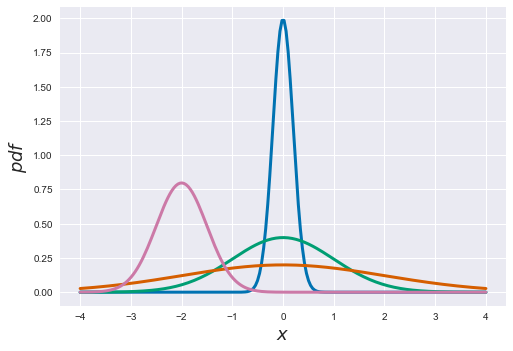

In [2]:
x_values = np.linspace(-4, 4, 200)
values = [(0, .2), (0, 1), (0, 2), (-2, .5)]
color = ['b', 'g', 'r', 'm']
for val, c in zip(values, color):
    gauss = stats.norm(*val).pdf(x_values)
    plt.plot(x_values, gauss, lw=3, color=c)
plt.xlabel('$x$', fontsize=18);
plt.ylabel('$pdf$', fontsize=18);

La integral de la $pdf$ es llamada función de distribución acumulada ($cdf$):

\begin{equation}
cdf(x) = \int_{-\infty}^{x} g(x) d(x)
\end{equation}

En algunas situaciones se prefiere hablar de la función de supervivencia:

\begin{equation}
S(x) = 1 - cdf 
\end{equation}

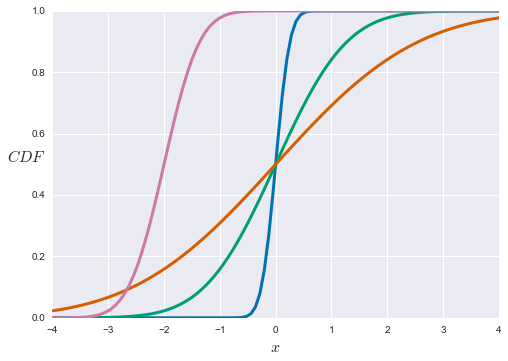

In [20]:
for val, c in zip(values, color):
    gauss = stats.norm(*val).cdf(x_values)
    plt.plot(x_values, gauss, lw=3, color=c)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$CDF$', fontsize=16, rotation=0);

### 1.6.5 Incerteza

Algo a tener en cuenta es que **siempre** una variable $x$ que midamos tiene asociado un error o incerteza $er(x)$ (salvo que los datos sean sintéticos, o usted esté hablando con un _matemático puro_). Este error puede ser definido como la probabilidad de medir un valor $x$ dado que el valor _real_ es $\mu$:

$$
er(x) = p(x|\mu, I)
$$

Donde $I$ es algún parámetro (o conjunto de parámetros) de alguna distribución de probabilidad.

En muchos casos se asume que la distribución de errores es Gaussiana. Este supuesto a veces está justificado por nuestro _conocimiento específico de dominio_ y en otros casos por conveniencia matemática (las Gaussianas tienen varias propiedades que las hacen amenas para el análisis matemático).

$$
er(x|\mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}}
$$

En este caso $I$ es simplemente $\sigma$. La función de distribución del error puede además contener un error sistemático $b$ en cuyo caso $x-\mu$ en la expresión de arriba se convierte en $(x − b − \mu)$.

Cuando la distribución de los errores es la misma para todos los puntos se dice que hay _homocedasticidad_, caso contrario ocurre _heterocedasticidad_. Muchos de los métodos de la estadística clásica son válidos solo cuando la distribución de errores es homocedástica, existiendo métodos especiales para lidiar con la _heterocedasticidad_.

Es importante notar que en la práctica $er(x)$ describe tanto la variabilidad intrínseca de una (o múltiples) variable(s) en una población como también el error asociado a la medición.

### 1.6.6 Variables aleatorias

Una variable aleatoria es una variable que proviene de alguna distribución de probabilidad dada, en la práctica es el resultado de una observación, experimento o simulación. 

Existen dos principales tipos de variables aleatorias, las continuas y las discretas.

En muchos análisis estadísticos se asume que las variables aleatorias provienen de una misma distribución y que son independientes entre si. En estos casos se dice que dichas variables son independientes e idénticamente distribuidas (en ingles iid), es decir:

$p(x,y) = p(x) p(y)$ para todos los valores de $x$ e $y$.

Si una variable aleatoria $x$ proviene o está _distribuida_ según una distribución normal con media $\mu$ y desviación estándar $\sigma$ se suele escribir como:

$$
x \sim \mathcal{N} (\mu, \sigma)
$$

Un caso común de variable aleatoria que no es iid son las series temporales (y las cadenas de Markov) ya que existe una dependencia temporal de los valores que puede tomar una variable.

### 1.6.7 Distribuciones de probabilidad comunes

En los siguientes capítulos veremos que los bloques con los cuales se construyen los modelos estadísticos son las distribuciones de probabilidad. A continuación veremos algunas de las más comunes.

#### 1.6.7.1 Distribución uniforme

Aún siendo simple, la distribución [uniforme](https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29) es muy usada en estadística, por ej para representar nuestra ignorancia sobre el valor que pueda tomar un parámetro. La distribución uniforme tiene entropía cero (todos los estados son igualmente probables).

$$
p(x|a,b)=\begin{cases} \frac{1}{b-a} & para\ a \le x \le b \\ 0 &  para\ x<a\ o\ x>b \end{cases}
$$

0.5 0.08333333333333333


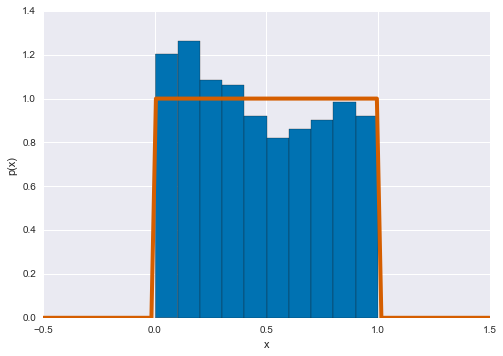

In [21]:
distri = stats.uniform(0, 1)  # distribución uniforme entre a=0 y b=1
x_values = np.linspace(-0.5, 1.5, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### 1.6.7.2 Distribución Gaussiana (o normal)

Es quizá la [distribución](https://en.wikipedia.org/wiki/Normal_distribution) más conocida. Por un lado por que muchos fenómenos pueden ser descriptos (aproximadamente) usando esta distribución. Por otro lado por que posee ciertas propiedades matemáticas que facilitan trabajar con ella de forma analítica. Es por ello que muchos de los resultados de la estadística frecuentista se basan en asumir una distribución Gaussiana. Por ejemplo el método de los mínimos cuadrados para ajustar modelos lineales no es válido cuando los errores medidos se desvían de una distribución normal.

La distribución Gaussiana se define usando dos parámetros, la media $\mu$ y la desviación estándar $\sigma$. Una distribución Gaussiana con $\mu = 0$ y $\sigma = 1$ es conocida como la _distribución Gaussiana estándar_.

$$
p(x|\mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}}
$$

0.0 1.0


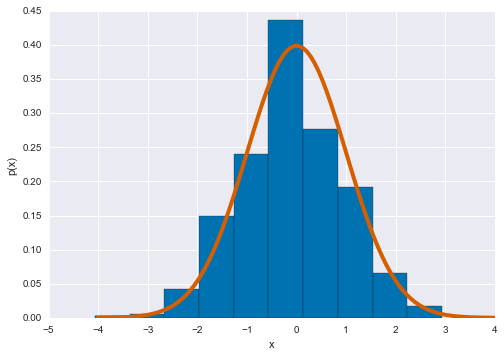

In [22]:
distri = stats.norm(loc=0, scale=1)  # media cero y desviación standard 1
x_values = np.linspace(-4, 4, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### 1.6.7.3 Distribución t de Student

Históricamente esta [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) surgió para estimar la media de una población normalmente distribuida cuando el tamaño de la muestra es pequeño. En estadística Bayesiana su uso más frecuente es el de generar modelos robustos a datos aberrantes, como veremos mas adelante. 


$$p(x\mid \nu,\mu,\sigma) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu}\sigma} \left(1+\frac{1}{\nu}\left(\frac{x-\mu}{\sigma}\right)^2\right)^{-\frac{\nu+1}{2}}
$$

donde $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function) y donde $\nu$ es un parámetro llamado _grados de libertad_ (nombre que tiene más sentido en un contexto frecuentista que en uno Bayesiano), como veremos a este parámetro le podríamos llamar _grado de normalidad_, ya que a medida que aumenta la distribución se aproxima a una Gaussiana. En el caso extremo de $\nu = \inf$ la distribución es exactamente igual a una Gaussiana.

En el otro _extremo_, cuando $\nu=1$, (aunque en realidad $\nu$ puede tomar valores por debajo de 1) estamos frente a una distribución de [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution). Es similar a una Gaussiana pero las colas decrecen muy lentamente, eso provoca que en teoría esta distribución no poseen una media o varianza definidas. Es decir, es posible calcular a partir de un conjunto de datos una media, pero si los datos provienen de una distribución de Cauchy, la dispersión alrededor de la media será alta y esta dispersión no disminuirá a medida que aumente el tamaño de la muestra. La razón de este comportamiento extraño es que en distribuciones como la Cauchy están dominadas por lo que sucede en las colas de la distribución, contrario a lo que sucede por ejemplo con la distribución Gaussiana.

Para esta distribución $\sigma$ no es la desviación estandard, que como ya se dijo podría estar indefinida, $\sigma$ es la _escala_. A medida que $\nu$ aumenta la _escala_ converge a la desviación estándar de una distribución Gaussiana.

0.0 8.0


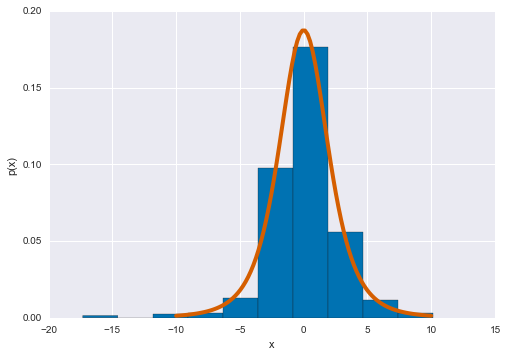

In [23]:
distri = stats.t(loc=0, scale=2, df=4) # media 0, escala 2, grados de libertad 4
x_values = np.linspace(-10, 10, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### 1.6.7.4 Distribución exponencial

La distribución [exponencial](https://en.wikipedia.org/wiki/Exponential_distribution) se define solo para $x > 0$. Esta distribución se suele usar para describir el tiempo que transcurre entre dos eventos que ocurren de forma continua e independiente a una taza fija. El número de tales eventos para un tiempo fijo lo da la distribución de Poisson (ver más adelante). Nosotros también la usaremos para fijar los _a prioris_ de $nu$ (los grados de libertad de distribución t de Student).

$$
p(x|\lambda) = \lambda e^{-\lambda x}
$$

La media y la desviación estandard de esta distribución están dadas por $\frac{1}{\lambda}$ 

Scipy usa una parametrización  diferente donde la escala es igual a $\frac{1}{\lambda}$

3.0 9.0


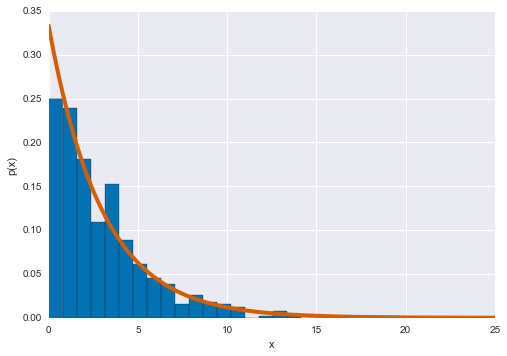

In [24]:
distri = stats.expon(scale=3)  # escala 3, lambda = 1/3
x_values = np.linspace(0, 25, 1000)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, bins=25, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### 1.6.7.5 Distribución beta

Es una [distribución](https://en.wikipedia.org/wiki/Beta_distribution) definida en el intervalo [0, 1]. Se usa para modelar el comportamiento de variables aleatorias limitadas a un intervalo finito. Es útil para modelar proporciones o porcentajes. 

$$
p(x|\alpha, \beta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1}
$$

El primer término es simplemente una constante de normalización que asegura que la integral de la $pdf$ de 1. $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function). Cuando $\alpha=1$ y $\beta=1$ la distribución beta se reduce a la distribución uniforme.

Si queremos expresar la distribución beta en función de la media y la dispersión alrededor de la media podemos hacerlo de la siguiente forma.

$$\alpha = \mu \kappa$$
$$\beta = (1 − \mu) \kappa$$

Siendo $\mu$ la media y $\kappa$ una parámetro llamado concentración a media que $\kappa$ aumenta la dispersión disminuye. Notese, además que $\kappa = \alpha + \beta$.

0.7142857142857143 0.025510204081632654


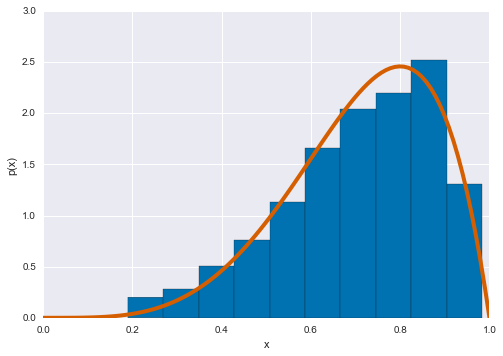

In [25]:
distri = stats.beta(5, 2)  # alfa=5, beta=2
x_values = np.linspace(0, 1, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### 1.6.7.6 Distribución Gamma

Scipy parametriza a la distribución [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) usando un parámetro $\alpha$ y uno $\theta$, usando estos parámetros la $pdf$ es:

$$
p(x \mid \alpha, \theta) = \frac{1}{\Gamma(\alpha) \theta^\alpha} x^{\alpha \,-\, 1} e^{-\frac{x}{\theta}}
$$

Una parametrización más común en estadística Bayesiana usa los parámetros $\alpha$ y  $\beta$, siendo $\beta = \frac{1}{\theta}$. Esta parametrización es usada por ejemplo por PyMC3. En este caso la pdf queda como:

$$
p(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}
$$

Esta distribución la usaremos principalmente para fijar _a prioris_ para las desviaciones standard (o en general escalas) de otras distribuciones. En muchos casos puede resultar mas útil o intuitivo expresar una distribución gama en función de la media y desviación estandard, siguiendo las siguientes relaciones.

$\alpha = \frac{\mu^2}{\sigma^2}$;
$\beta = \frac{\mu}{\sigma^2}$;
$\theta = \frac{\sigma^2}{\mu}$

Como veremos, PyMC3 permite expresar la distribución gama directamente usando la media y desviación estandard, sin necesidad de tener que convertir parámetros usando las relaciones anteriores.

La distribución gamma se reduce a la exponencial cuando $\alpha=1$.

1.5 0.75


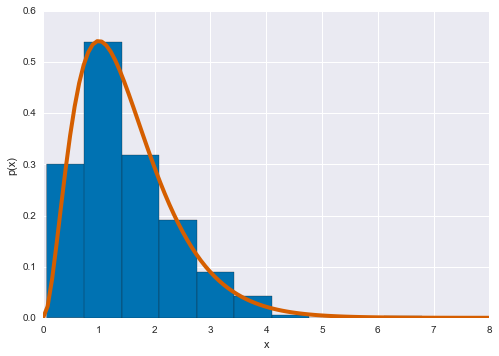

In [26]:
distri = stats.gamma(a=3, scale=0.5)  # alfa 3, theta 0.5
x_values = np.linspace(0, 8, 100)
x = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x_values)  # la pdf evaluada para todos los x_values
plt.hist(x, normed=True)
plt.plot (x_values, x_pdf, lw=4, color='r')
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### 1.6.7.7 Distribución binomial

Es la [distribución](https://en.wikipedia.org/wiki/Binomial_distribution) de probabilidad discreta que cuenta el número de éxitos en una secuencia de $n$ ensayos de Bernoulli (experimentos si/no) independientes entre sí, con una probabilidad fija $\theta$ de ocurrencia del éxito entre los ensayos.
Cuando $n=1$ esta distribución se reduce a la distribución de Bernoulli.

$$p(x|n,\theta)=\frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$$

El término $p^x(1-p)^{n-x}$ indica la probabilidad de obtener $x$ éxitos en $n$ intentos. Este término solo tiene en cuenta el número total de éxitos obtenidos pero no la secuencia en la que aparecieron. El primer término conocido como **coeficiente binomial** calcula todas las posibles combinaciones de $n$ en $x$, es decir el número de subconjuntos de $x$ elementos escogidos de un conjunto con $n$ elementos.

2.0 1.0


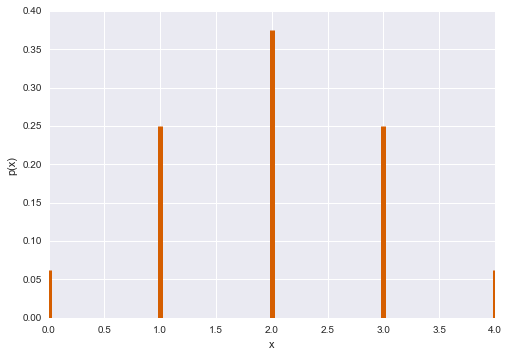

In [27]:
distri = stats.binom(n=4, p=0.5)  # n=número de intentos, p=probabilidad del evento "1"
x_values = np.arange(0, 5)
x_pmf = distri.pmf(x_values)  # la pdf evaluada para todos los x_values
plt.vlines(x_values, 0, x_pmf, colors='r', lw=5)
plt.xlabel('x')
plt.ylabel('p(x)')

mean, var = distri.stats(moments='mv')
print(mean, var)

#### 1.6.7.8 Distribución de Poisson

Es una [distribución](https://en.wikipedia.org/wiki/Poisson_distribution) de probabilidad discreta que expresa la probabilidad que $k$ eventos sucedan en un intervalo fijo de tiempo (o espacio o volumen) cuando estos eventos suceden con una taza promedio $\mu$ y de forma independiente entre si. Se la utiliza para modelar eventos con probabilidades pequeñas (sucesos _raros_), a medida que $\mu$ aumenta la distribución de asemeja cada vez más a una distribución Gaussiana (aunque sigue siendo discreta)

$$
p(k|\mu) = \frac{\mu^{k} e^{-\mu}}{k!}
$$

La media de esta distribución está dada por $\mu$ y la desviación estardad por $\sqrt{\mu}$. A medida que $\mu$ aumenta la distribución de Poisson se aproxima a una distribución Gaussiana.

2.3 2.3


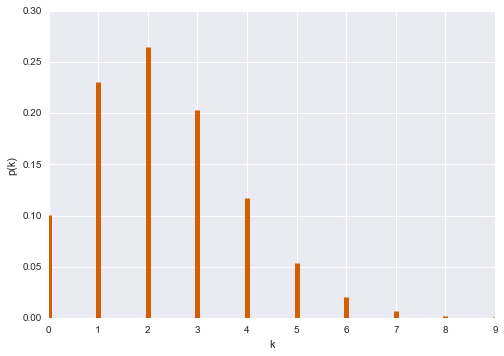

In [28]:
distri = stats.poisson(2.3)  # occurrencia media del evento
x_values = np.arange(0, 10)
x_pmf = distri.pmf(x_values)  # la pdf evaluada para todos los x_values
plt.vlines(x_values, 0, x_pmf, colors='r', lw=5)
plt.xlabel('k')
plt.ylabel('p(k)')

mean, var = distri.stats(moments='mv')
print(mean, var)

## 1.7 Probability plot

Un método gráfico para comparar si un conjunto de datos se ajusta a una distribución teórica es comparar los valores esperados de la distribución teórica en el eje $x$ y en el eje $y$ los valores de los datos ordenados de menor a mayor. Si la distribución empírica fuese exactamente igual a la teórica los puntos caerían sobre la linea recta a $45^{\circ}$, es decir la linea donde $y = x$.

In [29]:
muestra = np.random.randn(100)

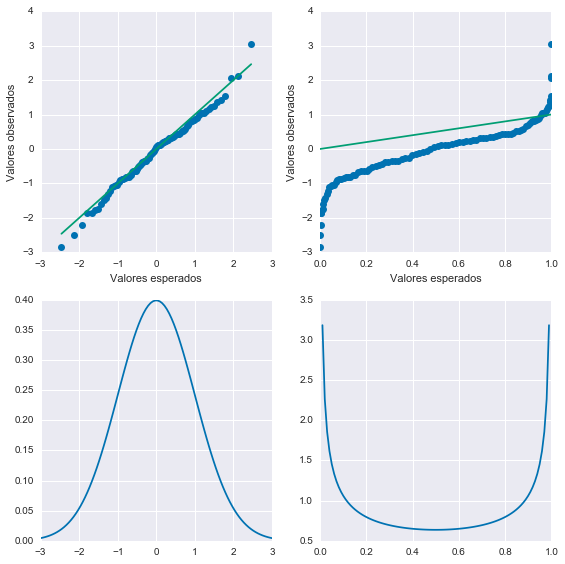

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
osm, osr = stats.probplot(muestra, fit=False, dist=stats.norm(0, 1))
plt.plot(osm, osr, 'o')
plt.plot(osm, osm)
plt.xlabel('Valores esperados')
plt.ylabel('Valores observados')

plt.subplot(2, 2, 2)
osm, osr = stats.probplot(muestra, fit=False, dist=stats.beta(0.5, 0.5))
plt.plot(osm, osr, 'o')
plt.plot(osm, osm)
plt.xlabel('Valores esperados')
plt.ylabel('Valores observados')

plt.subplot(2, 2, 3)
x = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm(0, 1).pdf(x))

plt.subplot(2, 2, 4)
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta(0.5, 0.5).pdf(x))

plt.tight_layout();

## 1.8 ¿Por qué Normal?

La distribución Normal (o Gaussiana) aparece una y otra vez en teoría y en la práctica estadística. Esto ocurre principalmente por dos razones.

1. El teorema del límite central garantiza que la distribución Gaussiana surja (casi) siempre que calculemos promedios. 
1. Las distribuciones Gaussianas son, matemáticamente, simples de manipular. Por lo que históricamente han sido la base de la mayoría de los desarrollos en estadística.

## 1.9 El teorema del límite central

El teorema del límite central dice que si tomamos $n$ valores (de forma independiente) de una distribución arbitraria, la media de esa variables sigue una distribución Gaussiana cuando $lim_{n\to\infty}$. Es decir aun cuando no sepamos nada sobre la distribución que genera los números podemos asegurar que la suma (o el promedio) de esas variables seguirá, de forma aproximada, una distribución Gaussiana.

Este resultado puede parecer sorprendente, pero tiene una explicación simple. Al tomar valores de una distribución los valores altos se compensan (en promedio) con los valores bajos, por lo que terminamos obteniendo una distribución suave y con un solo pico. Por supuesto este experimento mental no nos dice que la distribución deba ser una Gaussiana, para confirmar esto hay que sentarse y resolver el problema matemáticamente (o hacer una simulación como haremos brevemente)

Para que el teorema del límite central se cumpla se deben cumplir los siguientes supuestos.

1. Las variables se muestrean de forma independiente
1. Las variables provienen de la misma distribución
1. La media y la desviación estándar de la distribución tiene que ser finita

Los criterios 1 y 2 se pueden relajar _bastante_ y aún así obtendremos aproximadamente una Gaussiana, pero del criterio 3 no hay forma de escapar. Para distribuciones como la distribución de Cauchy o Paretto, que no posen varianza definida este teorema no se aplica. El promedio de $N$ valores provenientes de una distribución Cauchy no siguen una Gaussiana sino una distribución de Cauchy.

El teorema del límite central explica la prevalencia de la distribución Gaussiana en la naturaleza. Muchos de los fenómenos que estudiamos se pueden explicar como fluctuaciones alrededor de una media, es decir tiene que ver con el cálculo de promedios.

/home/osvaldo/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


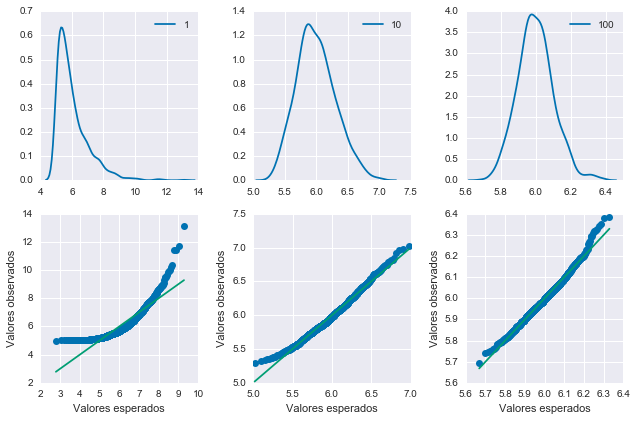

In [31]:
plt.figure(figsize=(9,6))
iters = 1000
distri = stats.expon(5)
for i, n in enumerate([1, 10, 100]):
    sample = np.mean(distri.rvs((n, iters)), axis=0)
    plt.subplot(2, 3, i+1)
    sns.kdeplot(sample, label=n)
    plt.subplot(2, 3, i+4)
    osm, osr = stats.probplot(sample, dist=stats.norm(sample.mean(), sample.std()), fit=False)
    plt.plot(osm, osr, 'o')
    plt.plot(osm, osm)
    plt.xlabel('Valores esperados')
    plt.ylabel('Valores observados')

plt.tight_layout()

## 1.10 La ley de los grandes números (el casino siempre gana).

El valor promedio calculado para una muestra converge al valor esperado (media) de dicha distribución. Al igual que el teorema del límite central esto no es cierto para la distribución de Cauchy (la cual no tiene media finita).

La ley de los grandes números se suele malinterpretar y dar lugar a la paradoja del apostador. Un ejemplo de esta paradoja es creer que conviene apostar en la lotería/quiniela a un número _atrasado_, es decir un número que hace tiempo que no sale. El razonamiento, erróneo, es que como todos los números tienen la misma probabilidad a largo plazo (según la ley de los grande números) si un número viene _atrasado_ entonces hay alguna especie de fuerza que aumenta la probabilidad de ese número en el próximo sorteo para así re-establecer la equiprobabilidad de los números. 

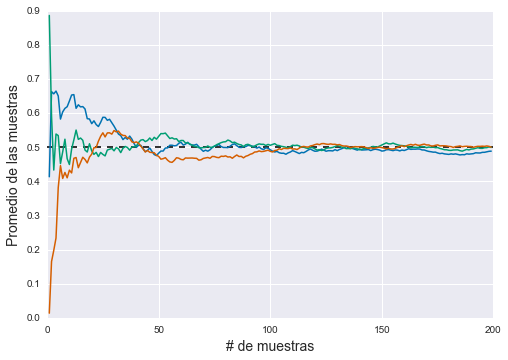

In [32]:
tamaño_muestra = 200
muestras = range(1, tamaño_muestra)
media = 0.5

for _ in range(3):
    muestra = stats.uniform(0, 1).rvs(tamaño_muestra)
    promedio = [muestra[:i].mean() for i in muestras]
    plt.plot(muestras, promedio, lw=1.5)

plt.hlines(media, 0, tamaño_muestra, linestyle='--', color='k')
plt.ylabel("Promedio de las muestras", fontsize=14)
plt.xlabel("# de muestras", fontsize=14);

## 1.11 Z-score

Es una cantidad adimensional que expresa que indica el número de desviaciones estándar que un dato está por encima o por debajo de la media. Cuando el Z-score es positivo el dato está por encima de la media y cuando es negativo está por debajo de la media. Se calcula como

$$z = \frac{x - \mu}{\sigma}$$

Donde:

$\mu$ es la media de la población
$\sigma$ es la desviación estándar de la población

El proceso de restar la media y dividir por la desviación estándar se llama normalización o estandarización.

## 1.12 Error estándar

El error estándar es la desviación estándar de alguna medida estimada, por lo general la media (aunque podría ser cualquier otra cantidad).

Si tomamos un conjunto de datos y calculamos la media de esos datos y luego tomamos otra muestra y calculamos la media y luego otra y otra, obtendremos que los valores de la media no son siempre los mismos. Si tomamos todas esas medias obtendremos una distribución de medias con una media y desviación estándar esa desviación estándar será el error estándar de la media. El error estándar de la media se suele estimar como: 

$$\frac{\sigma}{\sqrt(n)}$$

donde $\sigma$ es la desviación estándar de los datos y $n$ la cantidad de datos.

## 1.13 Para seguir leyendo

* [wikipedia :-)](http://en.wikipedia.org)
* [Think Stats](http://greenteapress.com/thinkstats/)
* [Data Analysis with Open Source Tools](http://shop.oreilly.com/product/9780596802363.do)

In [33]:
import sys, IPython, scipy, matplotlib, platform
print("Esta notebook fue creada en una computadora %s corriendo %s y usando:\nPython %s\nIPython %s\nNumPy %s\nSciPy %s\nMatplotlib %s\nSeaborn %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__))

Esta notebook fue creada en una computadora x86_64 corriendo debian stretch/sid y usando:
Python 3.5.2
IPython 5.0.0
NumPy 1.11.2
SciPy 0.18.1
Matplotlib 1.5.3
Seaborn 0.7.1

